In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
musicd = pd.read_csv("E:/Kaggle/Music/train.csv")

In [3]:
musicd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


In [4]:
musicd.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


In [5]:
musicd.describe(include='all')

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
count,8000.000000,8000.000000,8000,8000.000000,8000.000000,8000.000000,8000.000000
unique,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,NaN,Country,NaN,NaN,NaN,NaN
freq,NaN,NaN,1443,NaN,NaN,NaN,NaN
mean,273.589503,4.940125,NaN,129.077731,0.499154,2001.003625,49.334637
std,71.708680,2.585754,NaN,39.988642,0.289179,12.356535,21.296583
min,150.002909,1.000000,NaN,60.013660,0.000017,1980.000000,0.000000
25%,212.088516,3.000000,NaN,94.237178,0.250352,1990.000000,33.075306
50%,273.014753,5.000000,NaN,129.673045,0.495696,2001.000000,49.286768
75%,335.088452,7.000000,NaN,162.812788,0.751058,2012.000000,65.515098


<Axes: xlabel='Genre', ylabel='Count'>

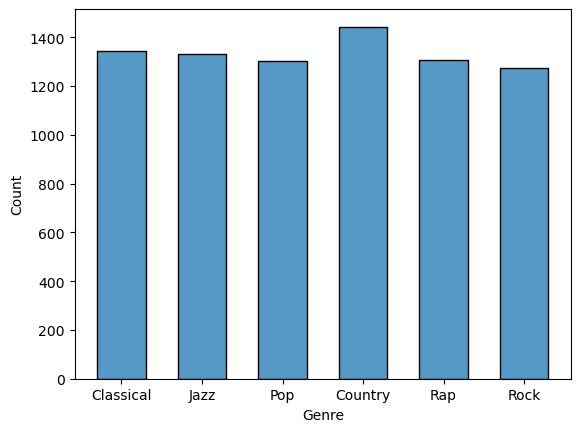

In [6]:
sns.histplot(x='Genre', data=musicd, shrink=0.6)

<Axes: xlabel='ReleasedYear', ylabel='Popularity'>

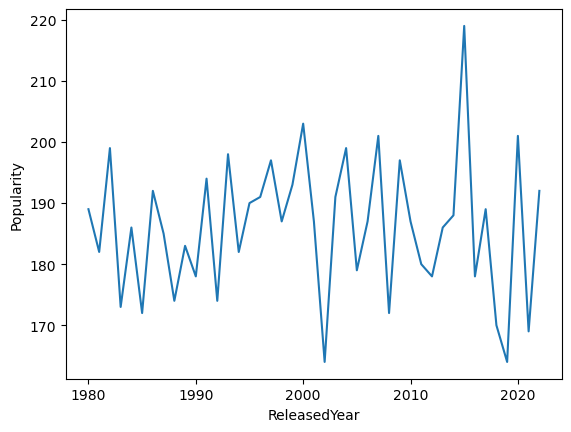

In [7]:
grouped =  musicd.groupby('ReleasedYear')['Popularity'].count().reset_index()
sns.lineplot(x='ReleasedYear', y='Popularity', data=grouped)

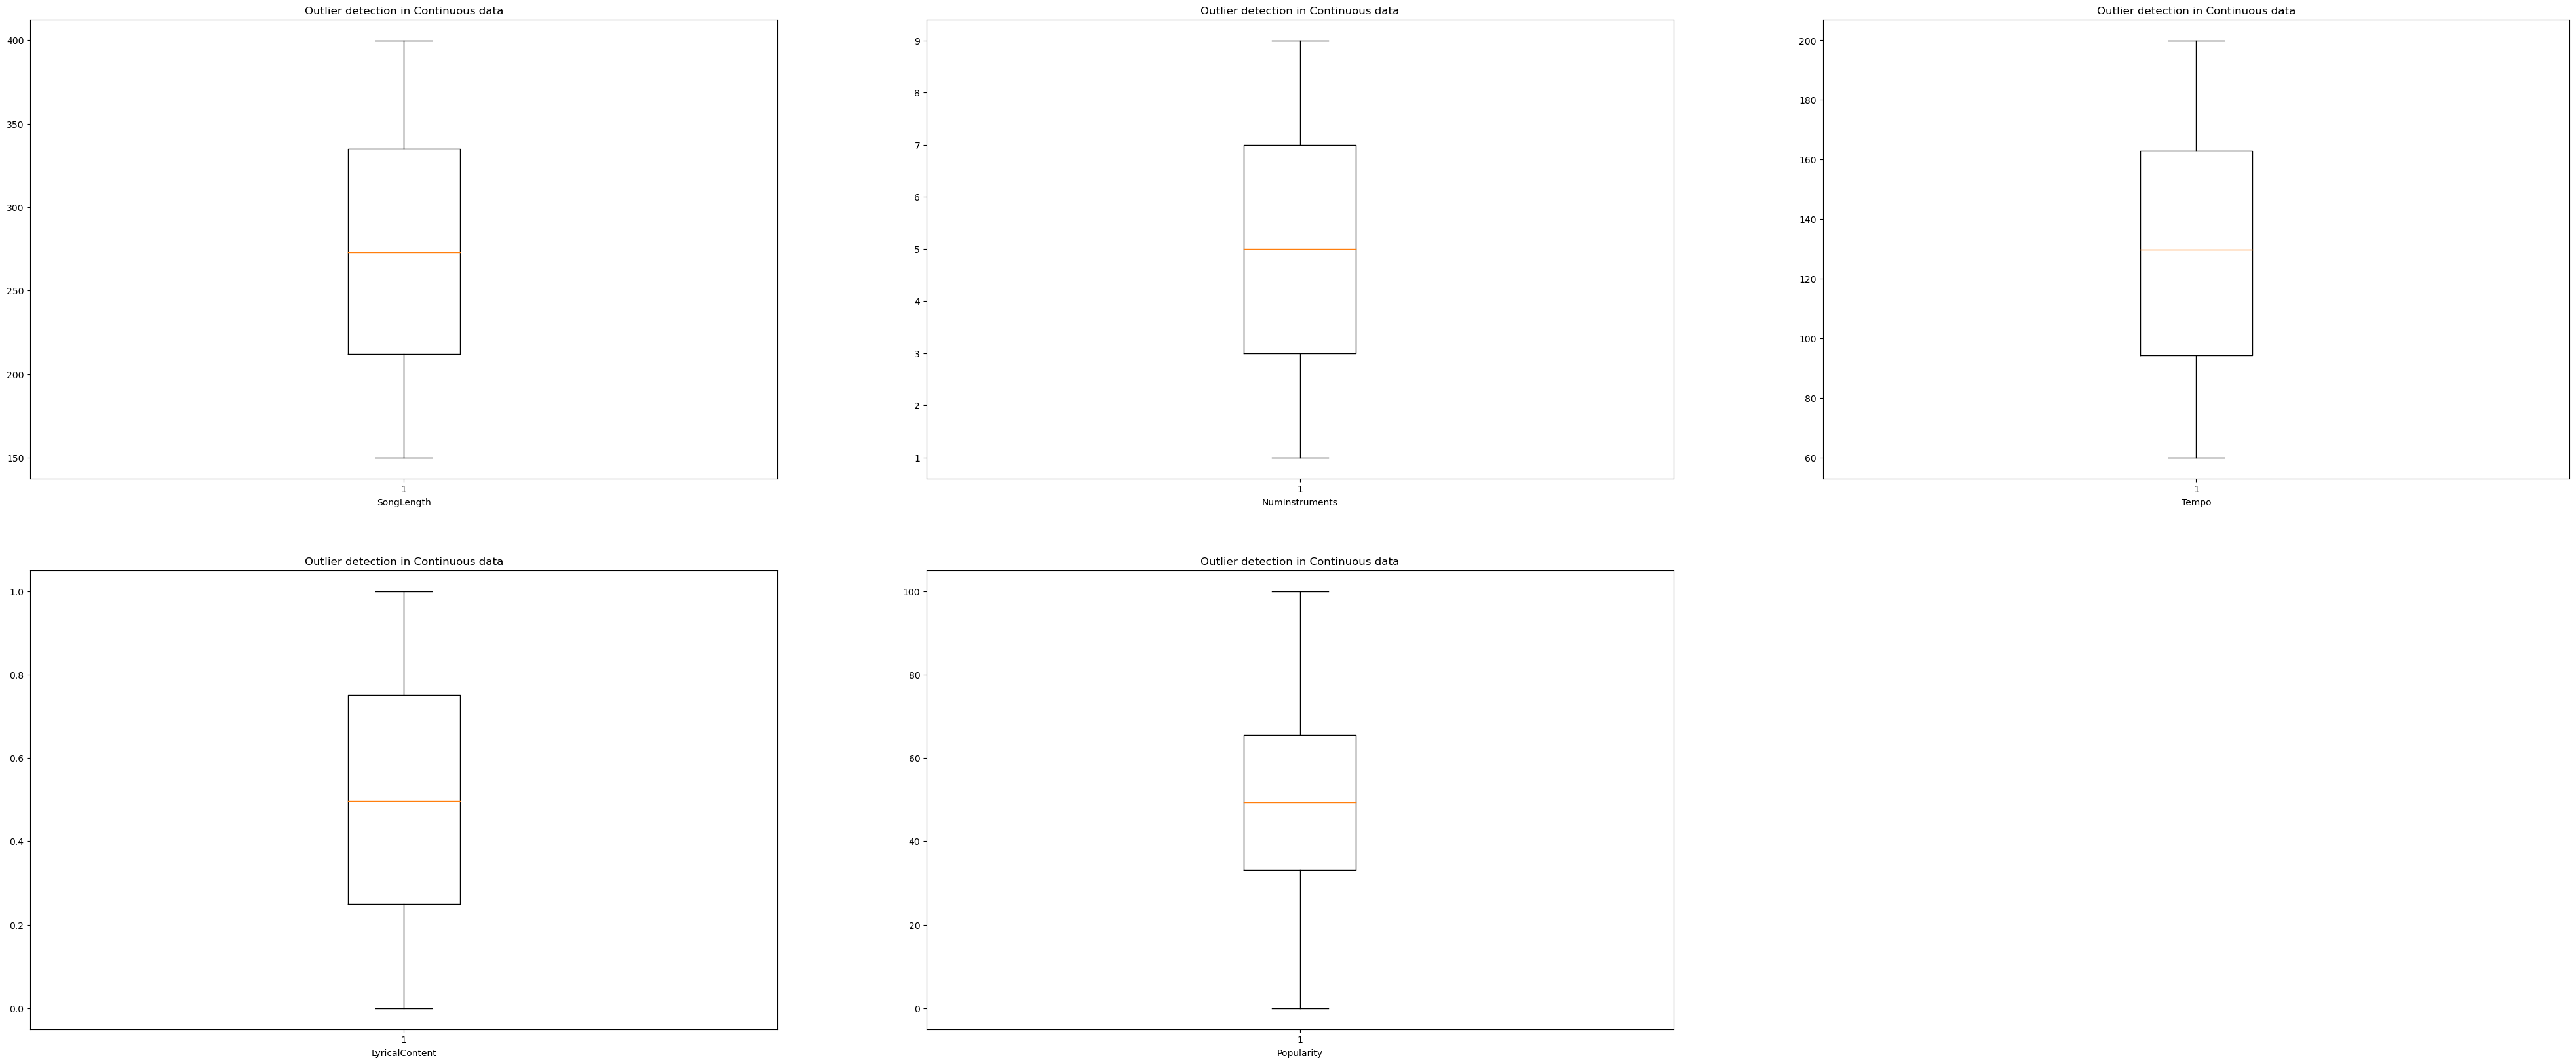

In [8]:
#Outlier detection using the boxplots
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in ['SongLength','NumInstruments','Tempo','LyricalContent','Popularity']:
    plt.subplot(2,3,c)
    plt.title("Outlier detection in Continuous data")
    plt.xlabel(i)
    plt.boxplot(x=musicd[f"{i}"])
    c+=1

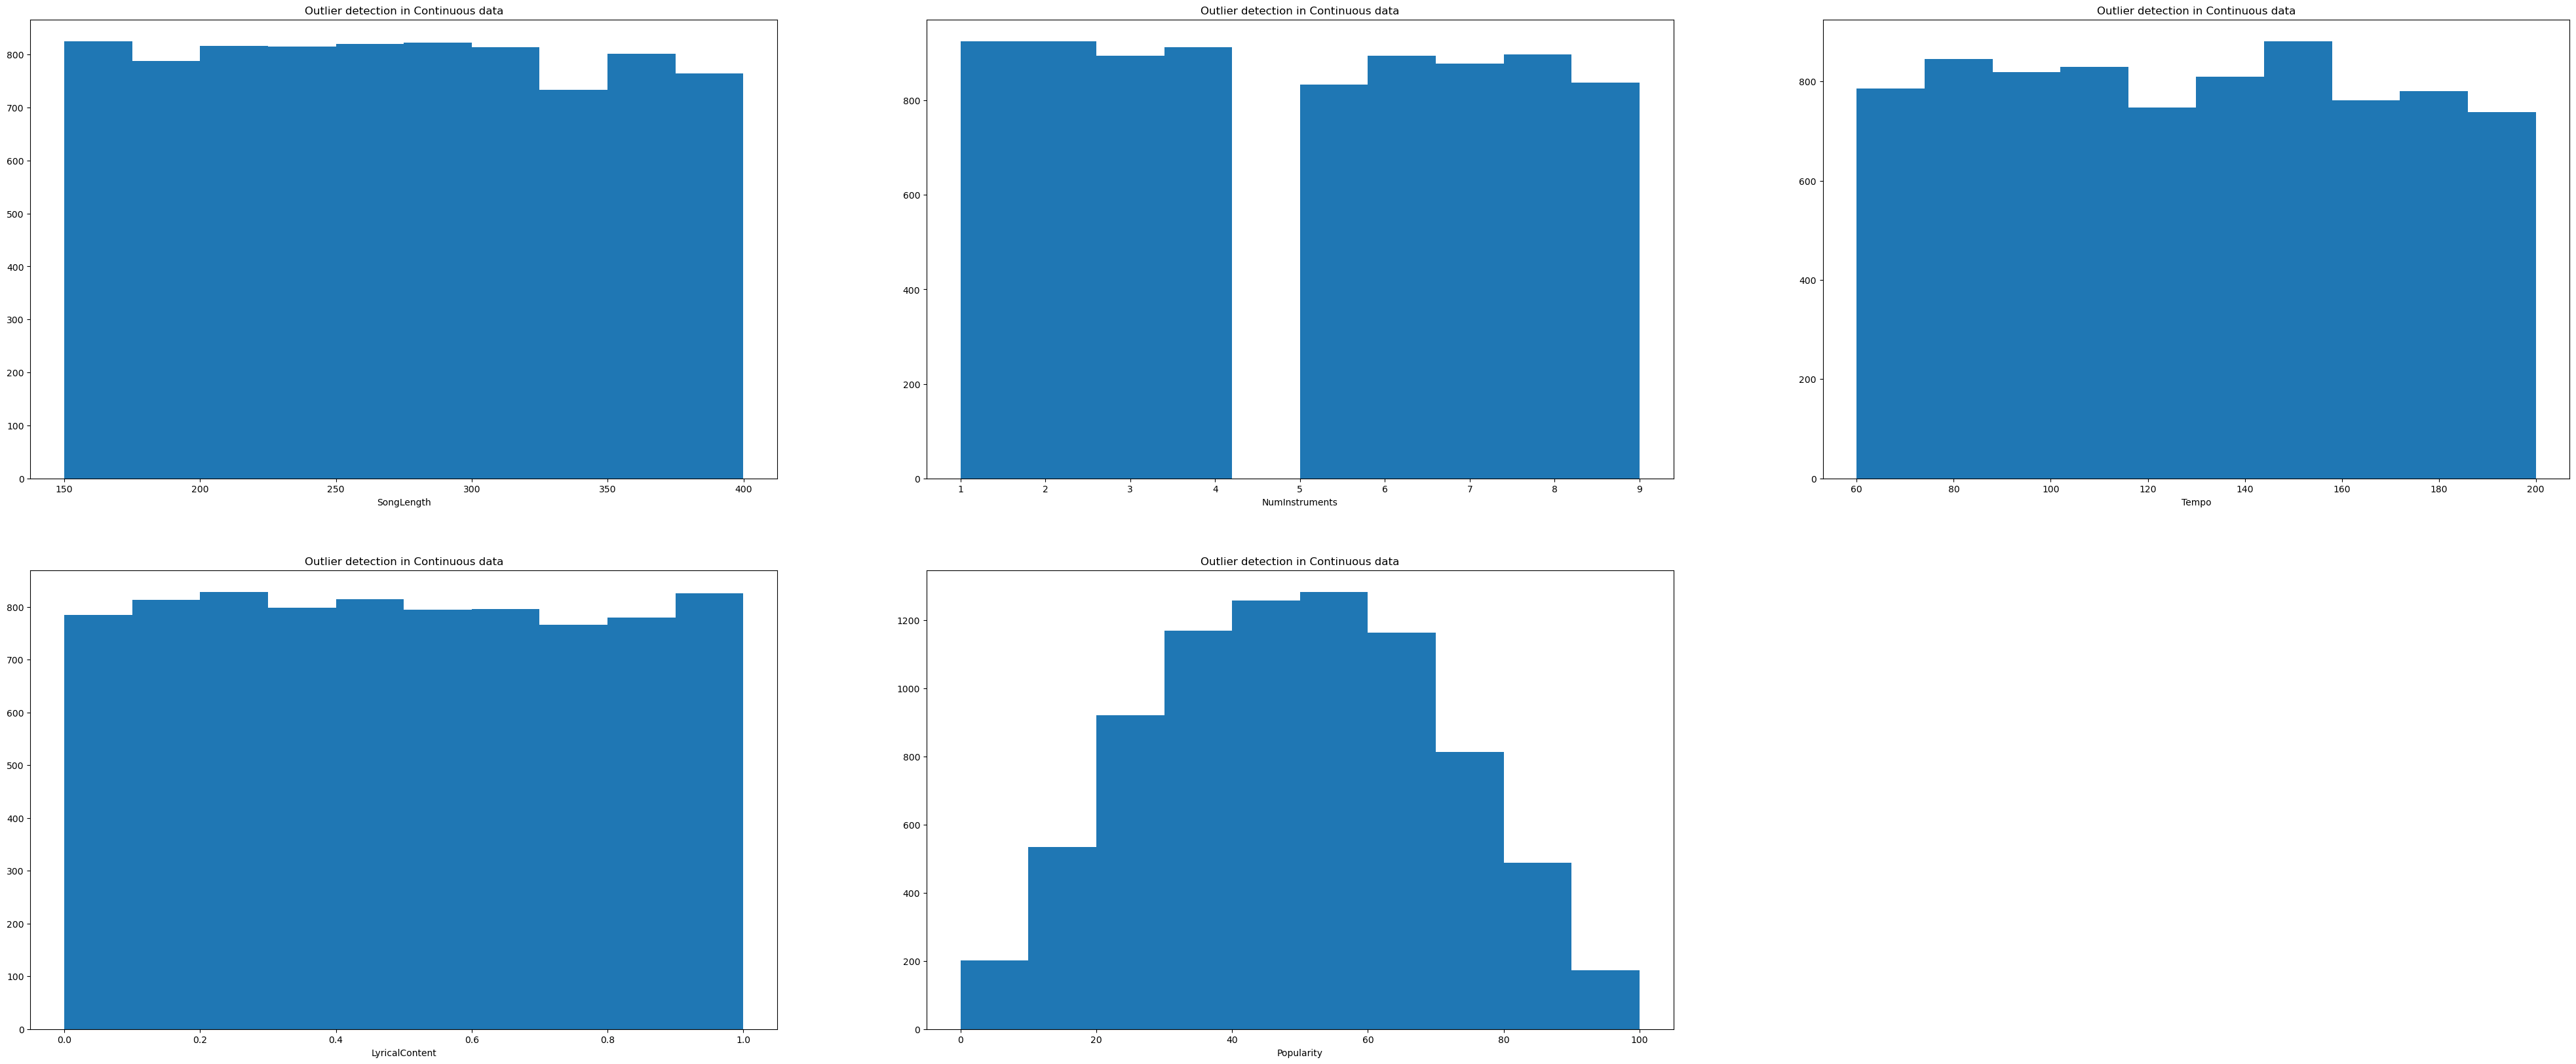

In [9]:
#Outlier detection using the histogram
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in ['SongLength','NumInstruments','Tempo','LyricalContent','Popularity']:
    plt.subplot(2,3,c)
    plt.title("Outlier detection in Continuous data")
    plt.xlabel(i)
    plt.hist(x=musicd[f"{i}"])
    c+=1

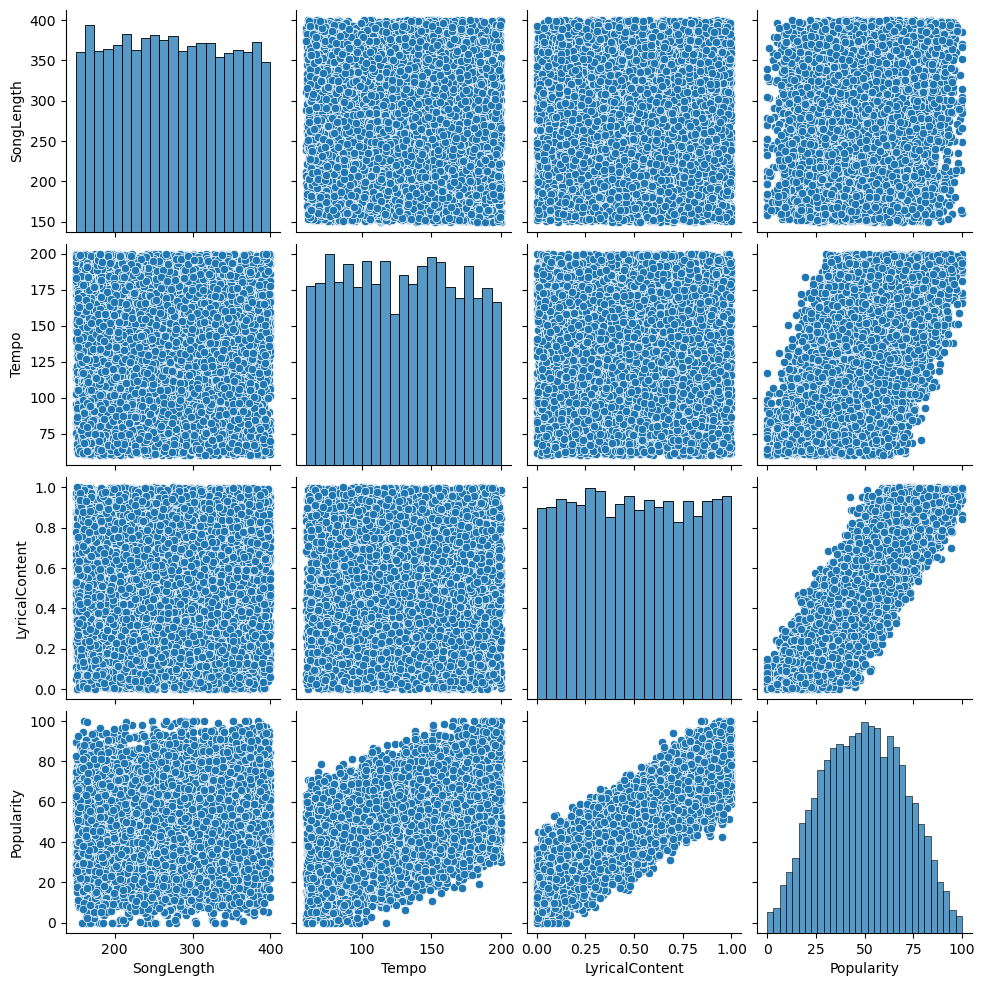

In [10]:
#Relationship between all continuous and the response variable
sns.pairplot(data=musicd[['SongLength','Tempo','LyricalContent','Popularity']])

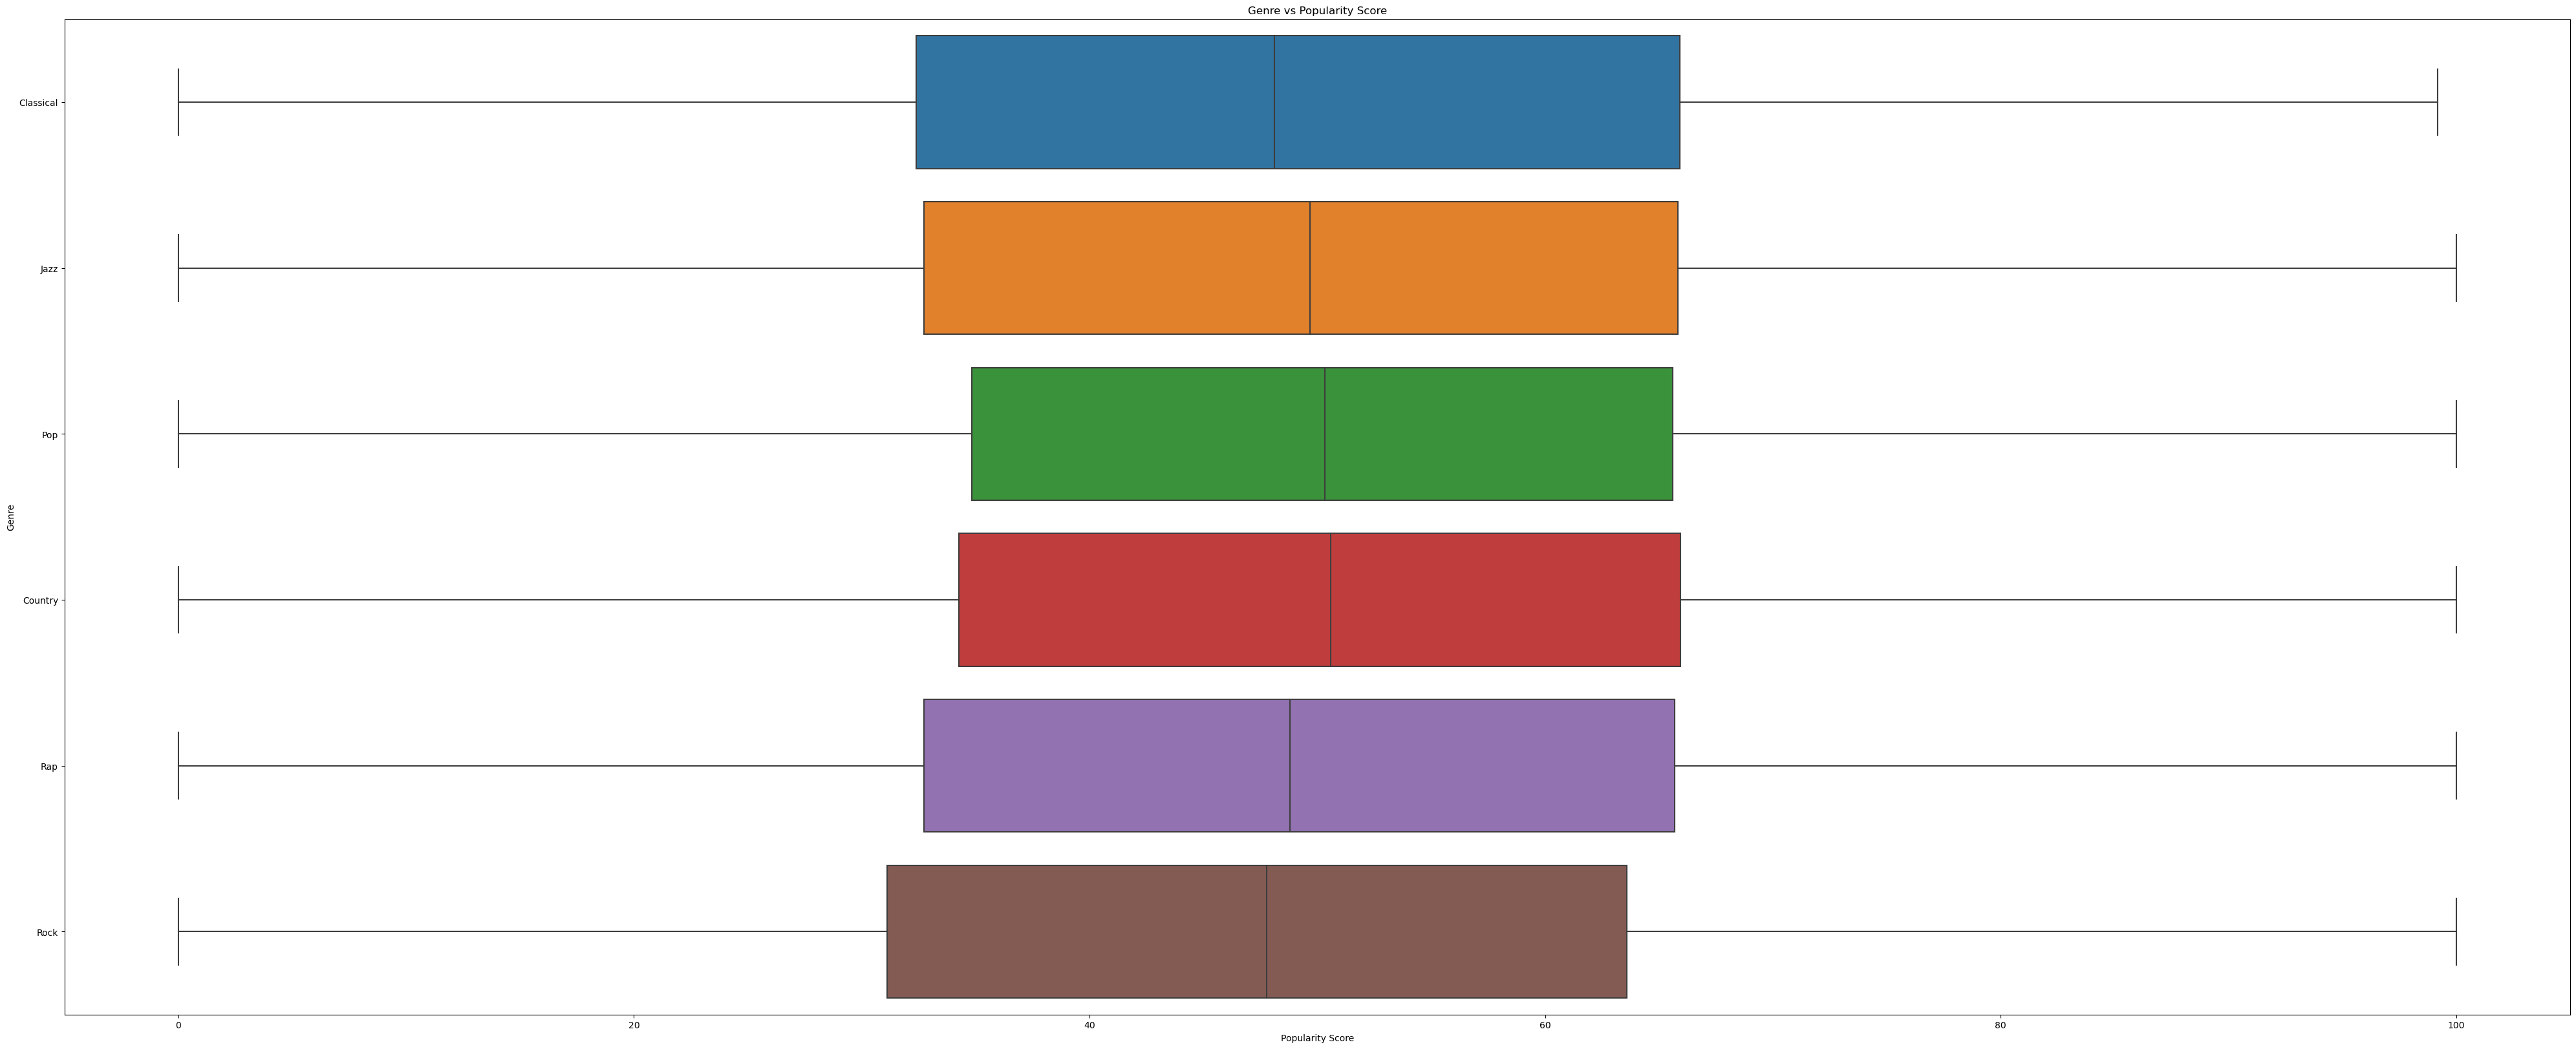

In [11]:
#Relationship between Popularity and Genre
p = sns.boxplot(data=musicd, x='Popularity', y='Genre')
plt.xlabel('Popularity Score')
plt.ylabel('Genre')
plt.title("Genre vs Popularity Score")
plt.show()

2.0866916278662386


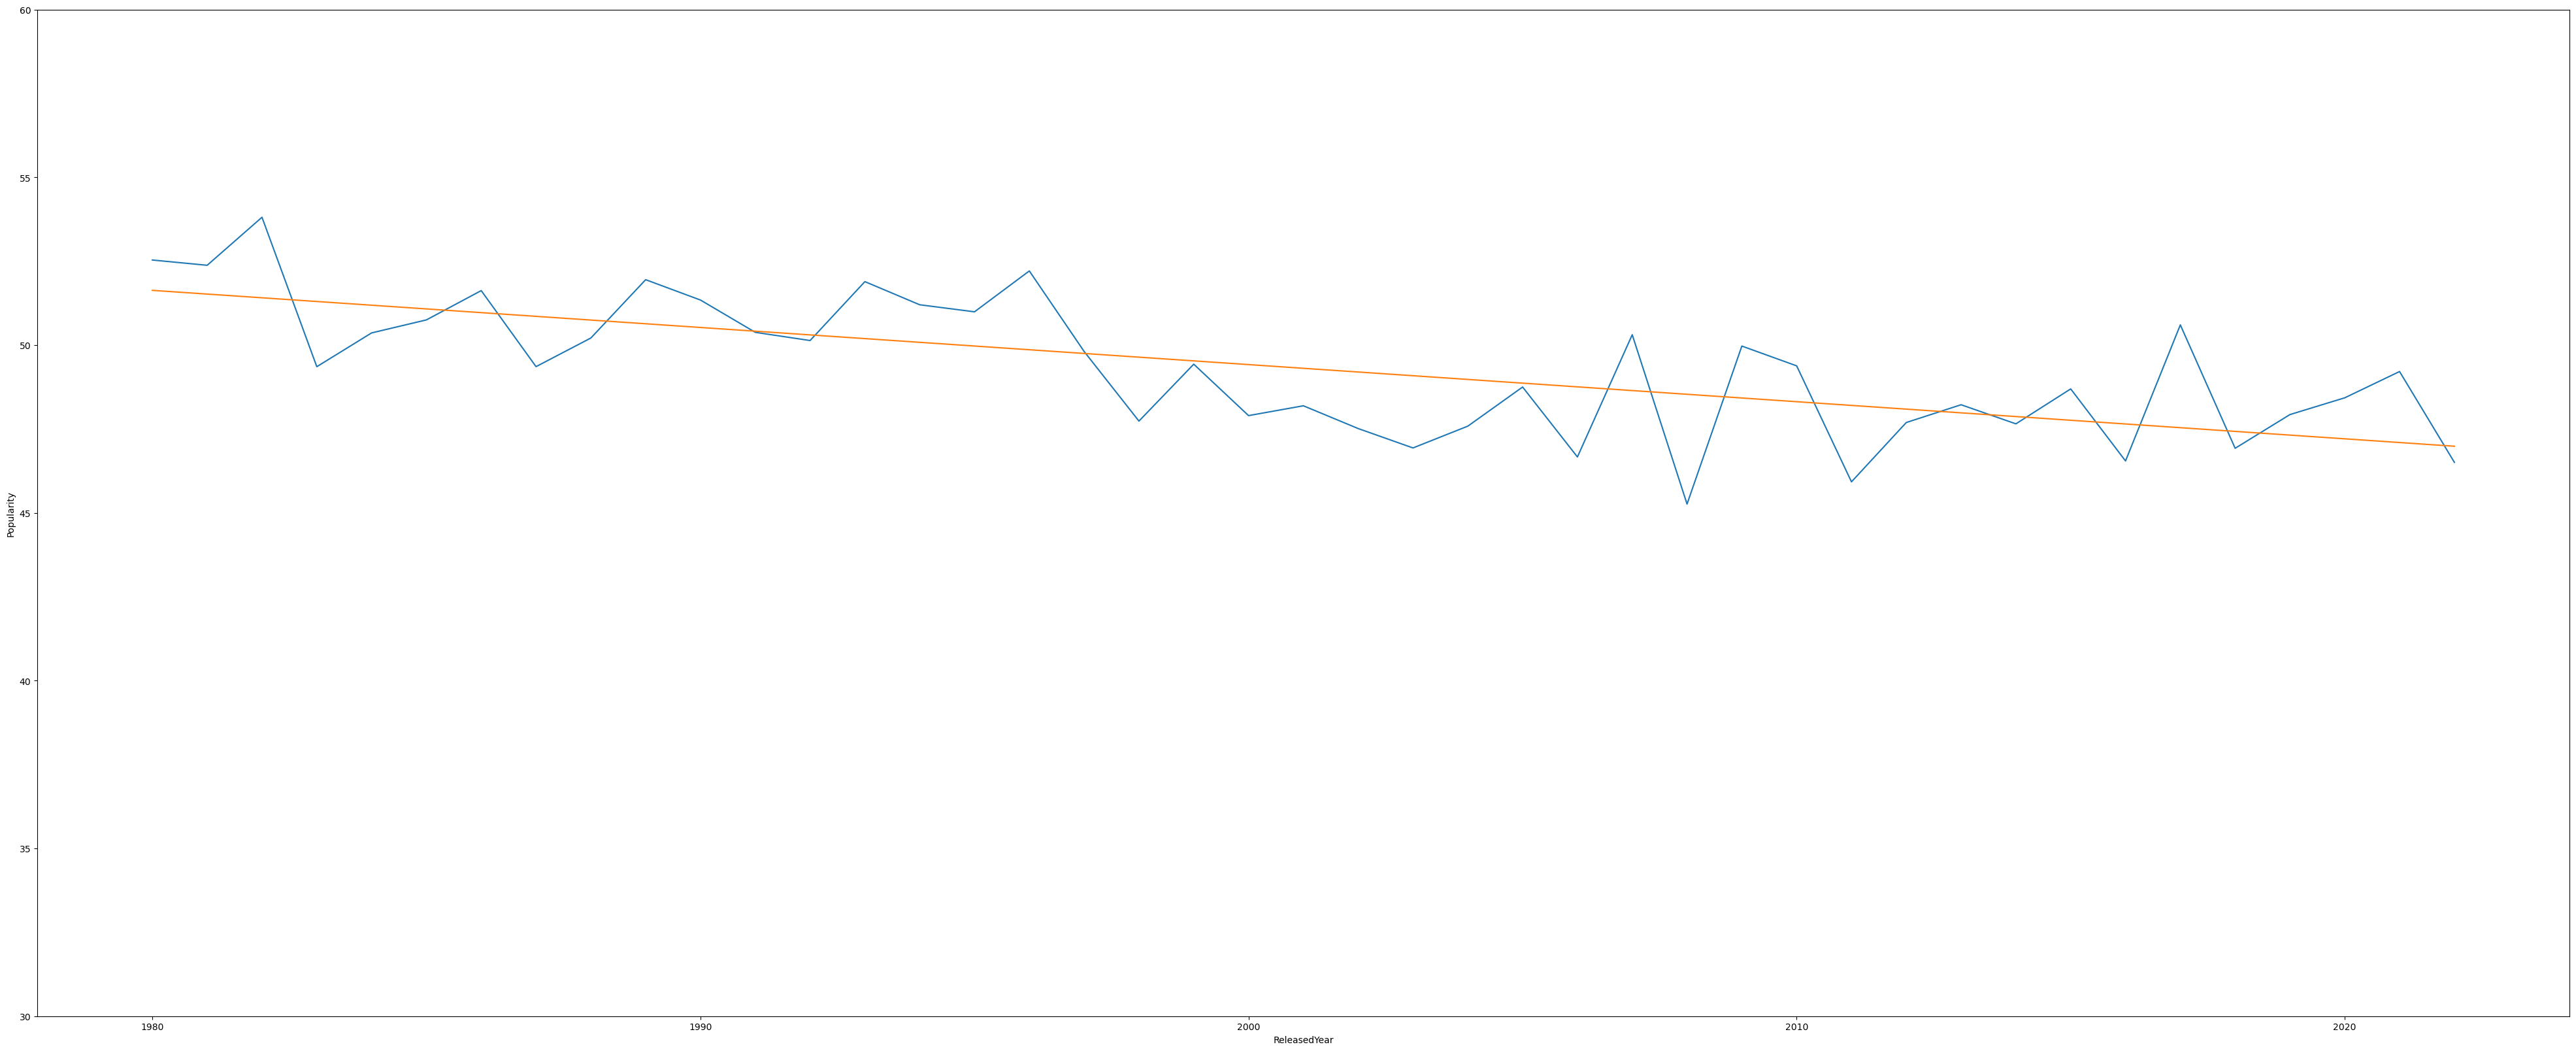

In [48]:
#Relationship between Popularity and Released Year
grouped =  musicd.groupby('ReleasedYear')['Popularity'].mean().reset_index()
sns.lineplot(x='ReleasedYear', y='Popularity', data=grouped)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(grouped.ReleasedYear.values.reshape(-1, 1), grouped.Popularity.values.reshape(-1, 1))
y_pred = lr.predict(grouped.ReleasedYear.values.reshape(-1, 1))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(grouped.Popularity,y_pred))
y_pred = y_pred.flatten()
sns.lineplot(x=grouped.ReleasedYear, y=y_pred)
plt.ylim(30,60)
plt.show()

In [29]:
overall_mean = musicd['Popularity'].mean()
ssm_o = np.sum((musicd['Popularity'] - overall_mean)**2)

p_mean = 1
n=musicd.shape[0]

grouped = musicd.groupby('Genre')['Popularity'].mean().reset_index()
final = pd.merge(grouped, musicd[['Genre','Popularity']], on='Genre', how='inner')

p_fit =  len(np.unique(final['Genre']))
ssm_fit =  np.sum((final['Popularity_x']- final['Popularity_y']) ** 2)
print(overall_mean, ssm_o, ssm_fit, p_mean, p_fit, n)

f_value = ((ssm_o - ssm_fit)/(p_fit-p_mean))/(ssm_fit/(n-p_fit))

from scipy.stats import f
p_value= f.sf(f_value, p_fit-p_mean, n-p_fit)

print(f_value, p_value)
#P value tells us that the result is significant, there is some diffrence in the mean that the Genre brings to the popularity

49.33463695402244 3627902.0862684613 3621708.978614027 1 6 8000
2.733941511142209 0.017915344446322926


In [210]:
dummy_variables=pd.DataFrame()
for i in musicd.Genre.unique():
    dummy_variables[f'{i}'] = musicd['Genre'].apply(lambda x: 1 if x==f'{i}' else 0)
print(dummy_variables.head())

   Classical  Jazz  Pop  Country  Rap  Rock
0          1     0    0        0    0     0
1          0     1    0        0    0     0
2          0     1    0        0    0     0
3          0     0    1        0    0     0
4          0     0    0        1    0     0


In [211]:
X=musicd[['SongLength','Tempo','LyricalContent','ReleasedYear']]
X = pd.concat((X, dummy_variables), axis=1)

In [212]:
y=musicd.Popularity

In [213]:
# from sklearn.model_selection import train_test_split
# # X=musicd[['SongLength','Tempo','LyricalContent','ReleasedYear']]
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=112)

# class Linear_Regression():
#     def __init__(self, n_iter=1000, alpha=0.01):
#         self.n_iter=n_iter
#         self.alpha=alpha
    
#     def fit_closed(self, X, y ):
#         X.insert(0,'Intercept',1)
#         self.W = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
#         return self.W
    
#     def predict(self, X):
#         X.insert(0,'Intercept',1)
#         y_pred = X.values @ self.W
#         return y_pred

# lr= Linear_Regression()
# lr.fit_closed(X_train.copy(),y_train.copy())
# y_pred = lr.predict(X_test.copy())

# print(lr.W, y_pred.max(), y_pred.min())
# print(np.sum((y_pred-y_test.values)**2)/y_pred.shape[0])

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=112)
model=LinearRegression()
model.fit(X_train, y_train)
print(cross_val_score(model,X_train,y_train, cv=10))
y_pred = model.predict(X_test)
print(model.intercept_, model.coef_)
print("MSE:",np.sum((y_pred-y_test.values)**2)/y_pred.shape[0])
print("R2:", r2_score(y_test,y_pred))
print("Adjusted R2:", 1-((1-r2_score(y_test,y_pred))*(2000-1)/(2000-10-1)))

[0.93851748 0.93291108 0.94942489 0.94620248 0.93614499 0.9527548
 0.94585017 0.95146155 0.94237499 0.9379094 ]
231.52085725913935 [ 2.62673256e-02  2.47734981e-01  6.21580535e+01 -1.26140690e-01
  1.41729097e-02 -3.71482104e-01  9.26151238e-01  2.26773115e-02
 -2.63726378e-01 -3.27792977e-01]
MSE: 26.61938867039839
R2: 0.9402619853400731
Adjusted R2: 0.9399616433860262


In [216]:
train_data=pd.read_csv("E:/Kaggle/Music/train.csv")
dummy_variables=pd.DataFrame()
for i in train_data.Genre.unique():
    dummy_variables[f'{i}'] = train_data['Genre'].apply(lambda x: 1 if x==f'{i}' else 0)
# print(dummy_variables.head())

X=train_data[['SongLength','Tempo','LyricalContent','ReleasedYear']]
X = pd.concat((X, dummy_variables), axis=1)
y_pred = model.predict(X)

In [217]:
final_submission = pd.concat((train_data, pd.DataFrame(y_pred, columns=['Popularity'])), axis=1)

In [218]:
final_submission.to_csv("")

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534,14.761750
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689,32.056772
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880,49.909993
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001,74.880821
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489,80.224493
...,...,...,...,...,...,...,...,...
7995,398.120876,7,Classical,135.550681,0.101345,1996,40.695441,30.095844
7996,296.558875,7,Pop,133.586259,0.143948,2021,27.898666,27.348017
7997,227.407953,4,Classical,62.616766,0.142943,1986,10.871648,11.390446
7998,275.854318,5,Jazz,67.945166,0.182870,1993,11.234010,15.196199
